In [4]:
import matplotlib.pyplot as plt
import statistics
import random
import numpy as np
import pandas as pd
from statistics import variance as var
from scipy.ndimage.filters import gaussian_filter1d
from statistics import variance as var
from test_signal import *
from plot import *
from brute_force_segmentation import *
from approximated_segmentation import *
from approximated_segmentation_multi import *

In [ ]:
# create equally spaced points between -5 and 5
x = np.linspace(-5, 5, 19)

# calculate the y value for each element of the x vector
y = -0.5*x**2 + 28.5
y = gaussian_filter1d(y, sigma=14)
y2 = np.zeros(31) + 10
y3 = y2
y3 = np.append(y3, y)
y3 = np.append(y3, y2) 

ysmoothed = gaussian_filter1d(y3, sigma=3.7)
np.savetxt('resources/outfile.txt', ysmoothed, fmt='%d')

single_plot(ysmoothed, 'Reading point / a.u.', 'Signal range / a.u.')
plt.savefig("images/test_signal.svg", bbox_inches="tight")
plt.show()

In [ ]:
line_plot(ysmoothed, 'Reading point / a.u.', 'Signal range / a.u.', [20, 60], ["Test signal", "Segmentation line"])
plt.savefig("images/test_signal_segmented.svg", bbox_inches="tight")
plt.show()

In [ ]:
line_plot(ysmoothed, 'Reading point / a.u.', 'Signal range / a.u.', [20, 40, 60], ["Test signal", "Segmentation line"])
plt.savefig("images/test_signal_segmented_2.svg", bbox_inches="tight")
plt.show()

In [ ]:
# tot = create_test_signal()
# np.savetxt('resources/outfile2.txt', tot, fmt='%d')
# print(tot)

In [ ]:
data = np.loadtxt('resources/outfile2.txt', dtype = int)
A = data

single_plot(A, 'Reading point / a.u.', 'Signal range / a.u.')
plt.savefig("images/test_signal_2.svg", bbox_inches="tight")
plt.show()

In [ ]:
A = np.loadtxt('resources/outfile2.txt', dtype = int)

line_plot(A, 'Reading point / a.u.', 'Signal range / a.u.', [10, 30, 50, 70], ["Test signal", "Segmentation line"])
plt.savefig("images/test_signal_2_presegmentation.svg", bbox_inches="tight")
plt.show()

In [ ]:
A = np.loadtxt('resources/outfile2.txt', dtype = int)

line_plot(A, 'Reading point / a.u.', 'Signal range / a.u.', [20, 40, 60, 80], ["Test signal", "Segmentation line"])
plt.savefig("images/test_signal_2_segmented.svg", bbox_inches="tight")
plt.show()

In [ ]:
#BRUTE FORCE SEGMENTATION

C:\Users\bojan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\bojan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\bojan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[2, 4, 6, 8]


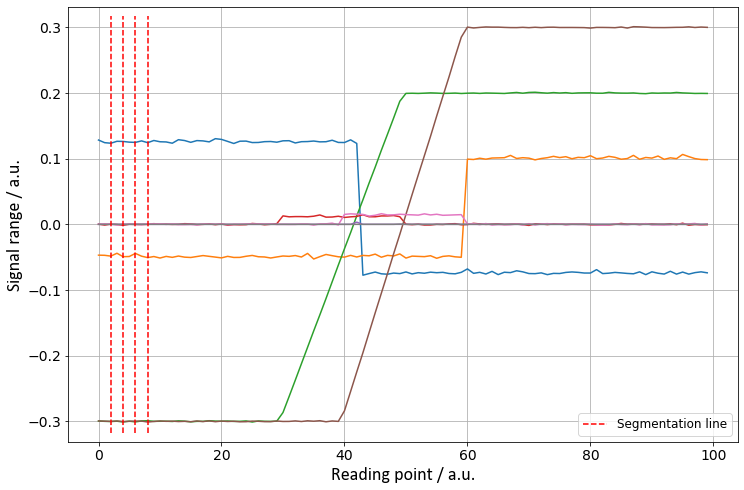

In [7]:
A = np.loadtxt('resources/outfile2.txt', dtype = int)

index = brute_force_segmentation(A)
print(index)

line_plot(A, 'Reading point / a.u.', 'Signal range / a.u.', index, ["Test signal", "Segmentation line"])
plt.show()

In [ ]:
#SEGMENTATION WITH CUSTOM ALGORITHM

In [ ]:
A = np.loadtxt('resources/outfile2.txt', dtype=int)

n_segments = 5
preseg = [10, 30, 50, 70]
# for i in range(1, n_segments):
#     preseg.append(int(len(A)*i/n_segments))

line_plot(A, 'Reading point / a.u.', 'Signal range / a.u.', preseg, ["Test signal", "Segmentation line"])
plt.show()

print("Presegmentation:", preseg)
print("")
print("Variance of segment 1:", np.var(A[0:preseg[0]]))
for i in range(0, len(preseg) - 1):
    print("Variance of segment", i + 2, ":", np.var(A[preseg[i]:preseg[i + 1]]))
print("Variance of segment", i + 3, ":", np.var(A[preseg[i + 1]:len(A)]))
var_sum = np.var(A[0:preseg[0]])
for i in range(0, len(preseg) - 1):
    var_sum += np.var(A[preseg[i]:preseg[i + 1]])
var_sum += np.var(A[preseg[i + 1]:len(A)])
print("Sum of variances:", var_sum)
print("")
print("")

var_segments = preseg

print("Segmentation indices:")
print("")

var_segments = approximated_segmentation(A, var_segments)
    
line_plot(A, 'Reading point / a.u.', 'Signal range / a.u.', var_segments, ["Test signal", "Segmentation line"])
plt.show()    
    
print("")
print("")
print("New segmentation:", var_segments)
print("")
print("Variance of segment 1:", np.var(A[0:var_segments[0]]))
for i in range(0, len(var_segments) - 1):
    print("Variance of segment", i + 2, ":", np.var(A[var_segments[i]:var_segments[i + 1]]))
print("Variance of segment", i + 3, ":", np.var(A[var_segments[i + 1]:len(A)]))
var_sum = np.var(A[0:var_segments[0]])
for i in range(0, len(var_segments) - 1):
    var_sum += np.var(A[var_segments[i]:var_segments[i + 1]])
var_sum += np.var(A[var_segments[i + 1]:len(A)])
print("Sum of variances:", var_sum)

In [ ]:
#DATA PREPARATION

In [ ]:
A = np.loadtxt('resources/all_processes.txt')
A = A.transpose()

resultall = []
resultallratio = []
minlist = []
ratiolist = []
maxvalue = 0
length = len(A[:, 0])
index = 939 #index 603
x = np.arange(1, length + 1)

single_plot(A[:, 519], 'Reading point / a.u.', 'Signal range / a.u.')
plt.savefig("images/sample_process.svg", bbox_inches="tight")
plt.show()

for i in range(0, index):
    result = []
    result = A[:, i]
    
    minlist = np.append(minlist, min(result))
    minimum = min(result)
    result = [x - minimum for x in result]
    resultall.append(result)
    
    ratio = max(result)
    ratiolist.append(round(ratio, 2))
    if ratio > maxvalue:
        maxvalue = ratio


resultallcopy = A.transpose()
multiplot(resultallcopy, 'Reading point / a.u.', 'Signal range / a.u.', color=[])
plt.savefig("images/all_processes.svg", bbox_inches="tight")
plt.show()
        
resultallbase = np.array(resultall)
multiplot(resultallbase, 'Reading point / a.u.', 'Signal range / a.u.', color=[])
plt.savefig("images/all_processes_base.svg", bbox_inches="tight")
plt.show()

maxvalue2 = max(ratiolist)
ratiolist = [round(x * (1/maxvalue2), 2) for x in ratiolist]
ratiolistunique = np.unique(ratiolist)
ratiolistcount = ratiolistunique
for i in range (0, len(ratiolistunique)):
    ratiolistcount[i] = ratiolist.count(ratiolistunique[i])
y_pos = np.arange(len(ratiolistunique))

bar_plot(y_pos, ratiolistcount, 'Relative max values', 'Frequency')
plt.show()

threshold = 0.6
for i in range(0, index):
    if max(resultall[i]) > threshold * maxvalue:
        resultall[i] = [x + minlist[i] for x in resultall[i]]
        resultallratio.append(resultall[i])

np.savetxt('resources/filtered_processes.txt', resultallratio)
resultallratio = np.array(resultallratio)
multiplot(resultallratio, 'Reading point / a.u.', 'Signal range / a.u.', color=[])
plt.savefig("images/all_processes_filtered.svg", bbox_inches="tight")
plt.show()

In [ ]:
#SEGMENTATION OF FILTERED DATA SET WITH CUSTOM ALGORITHM

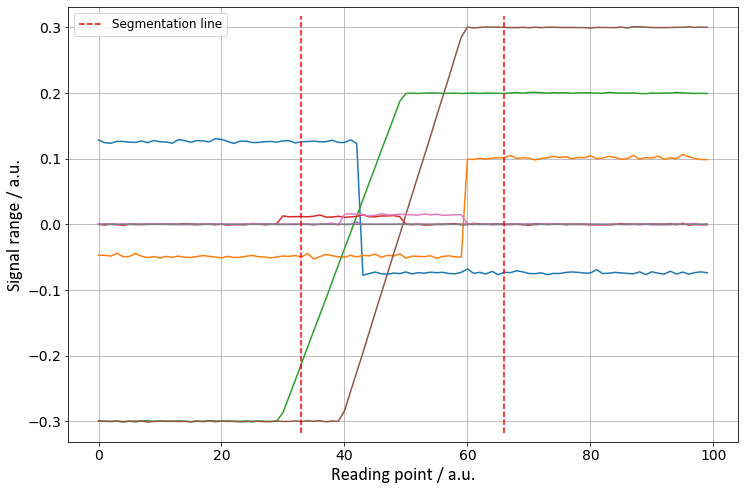

Presegmentation: [33, 66]

Variance of segment 1: 0.020366688405058727
Variance of segment 2 : 0.011606470345749317
Variance of segment 3 : 0.013874497550030514
Sum of variances: 0.045847656300838556


Segmentation indices:

[33, 66]
[47, 66]
[47, 58]
[40, 58]
[40, 55]
[40, 55]
[40, 55]
[40, 55]


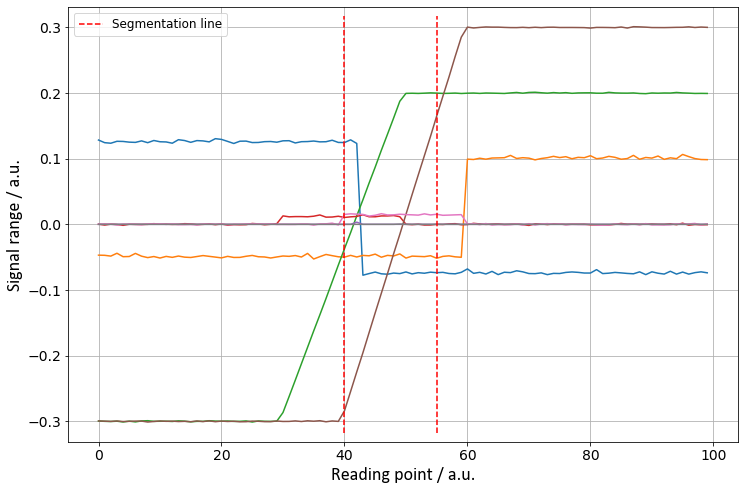



New segmentation: [40, 55]

Variance of segment 1: 0.01937713832297856
Variance of segment 2 : 0.006632729199578935
Variance of segment 3 : 0.013619111627353157
Sum of variances: 0.039628979149910655


In [12]:
import numpy as np


A = np.genfromtxt('C:/Users/bojan/Desktop/Studium Master WS21/masterarbeit/Inputs/testData.csv', delimiter=",")

n_segments = 3
preseg = []
for i in range(1, n_segments):
    preseg.append(int(len(A[1, :])*i/n_segments))

multiplot_lines(A, 'Reading point / a.u.', 'Signal range / a.u.', color=[], lines=preseg, label="Segmentation line")
plt.savefig("images/all_processes_presegmentation.svg", bbox_inches="tight")
plt.show()

print("Presegmentation:", preseg)
print("")
print("Variance of segment 1:", np.var(A[:, 0:preseg[0]]))
for i in range(0, len(preseg) - 1):
    print("Variance of segment", i + 2, ":", np.var(A[:, preseg[i]:preseg[i + 1]]))
print("Variance of segment", i + 3, ":", np.var(A[:, preseg[i + 1]:len(A[1, :])]))
var_sum = np.var(A[:, 0:preseg[0]])
for i in range(0, len(preseg) - 1):
    var_sum += np.var(A[:, preseg[i]:preseg[i + 1]])
var_sum += np.var(A[:, preseg[i + 1]:len(A[1, :])])
print("Sum of variances:", var_sum)
print("")
print("")

var_segments = preseg
anim = []

print("Segmentation indices:")
print("")

var_segments = approximated_segmentation_multi(A, var_segments)
    
multiplot_lines(A, 'Reading point / a.u.', 'Signal range / a.u.', color=[], lines=var_segments, label="Segmentation line")
plt.savefig("images/all_processes_segmented.svg", bbox_inches="tight")
plt.show()    
    
print("")
print("")
print("New segmentation:", var_segments)
print("")
print("Variance of segment 1:", np.var(A[:, 0:var_segments[0]]))
for i in range(0, len(var_segments) - 1):
    print("Variance of segment", i + 2, ":", np.var(A[:, var_segments[i]:var_segments[i + 1]]))
print("Variance of segment", i + 3, ":", np.var(A[:, var_segments[i + 1]:len(A[1, :])]))
var_sum = np.var(A[:, 0:var_segments[0]])
for i in range(0, len(var_segments) - 1):
    var_sum += np.var(A[:, var_segments[i]:var_segments[i + 1]])
var_sum += np.var(A[:, var_segments[i + 1]:len(A[1, :])])
print("Sum of variances:", var_sum)